In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
import sys
from keras.layers import Dense, Input, GlobalMaxPooling1D, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, Lambda, Concatenate
from keras.models import Model

In [69]:
from keras.datasets import mnist
import keras.backend as k

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [71]:
# x_train = x_train.reshape(x_train.shape[0],28,28,1)
# x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [72]:
input_layer = Input(shape=(28,28))
rnn1 = Bidirectional(LSTM(15, return_sequences=True))
x1 = rnn1(input_layer)
x1 = GlobalMaxPooling1D()(x1)

In [73]:
rnn2 = Bidirectional(LSTM(15, return_sequences=True))
permutor = Lambda(lambda t:k.permute_dimensions(t, pattern=(0,2,1)))
x2 = permutor(input_layer)
x2 = rnn2(x2)
x2 = GlobalMaxPooling1D()(x2)

In [74]:
concatenator = Concatenate(axis=1)
x = concatenator([x1,x2])

In [75]:
output = Dense(10,activation='softmax')(x)

In [76]:
model = Model(inputs=input_layer,outputs=output)

In [77]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])

W0806 13:28:47.022634 19336 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [78]:
r = model.fit(x_train,y_train, batch_size=32,epochs=10,validation_split=0.3)

W0806 13:29:35.918016 19336 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 57s 1ms/step - loss: 0.6157 - acc: 0.8418 - val_loss: 0.2384 - val_acc: 0.9352
Epoch 2/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.1983 - acc: 0.9442 - val_loss: 0.1729 - val_acc: 0.9493
Epoch 3/10
42000/42000 [==============================] - 57s 1ms/step - loss: 0.1491 - acc: 0.9559 - val_loss: 0.1311 - val_acc: 0.9612
Epoch 4/10
42000/42000 [==============================] - 57s 1ms/step - loss: 0.1224 - acc: 0.9639 - val_loss: 0.1286 - val_acc: 0.9616
Epoch 5/10
42000/42000 [==============================] - 58s 1ms/step - loss: 0.1047 - acc: 0.9695 - val_loss: 0.1074 - val_acc: 0.9674
Epoch 6/10
42000/42000 [==============================] - 59s 1ms/step - loss: 0.0913 - acc: 0.9726 - val_loss: 0.1023 - val_acc: 0.9689
Epoch 7/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.0833 - acc: 0.9753 - val_loss: 0.0963 - val_acc

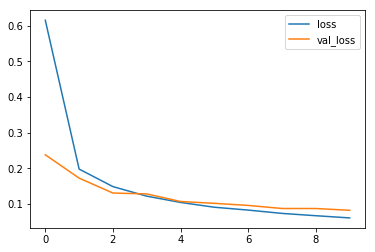

In [79]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

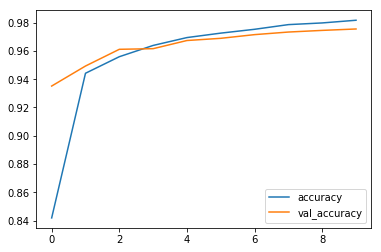

In [80]:
plt.plot(r.history['acc'],label='accuracy')
plt.plot(r.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

In [82]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 266us/step


[0.07546572196166962, 0.9753]